In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [46]:
data = sns.load_dataset("mpg")
data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [47]:
X = data[['horsepower','acceleration', 'weight']]
y = data['mpg']
X


,horsepower,acceleration,weight
0,130.0,12.0,3504
1,165.0,11.5,3693
2,150.0,11.0,3436
3,150.0,12.0,3433
4,140.0,10.5,3449
...,...,...,...
393,86.0,15.6,2790
394,52.0,24.6,2130
395,84.0,11.6,2295
396,79.0,18.6,2625


In [48]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
tf.random.set_seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [49]:
print(X_train.dtypes)
print(y_train.dtypes)


horsepower      float64
acceleration    float64
weight            int64
dtype: object
float64


In [50]:
print(X_train.isnull().sum())  # Sütun başına eksik değerlerin sayısı
print(y_train.isnull().sum())



horsepower      5
acceleration    0
weight          0
dtype: int64
0


In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Ortalama ile doldurma
X_train = imputer.fit_transform(X_train)  # Dönüştürme
X_test = imputer.transform(X_test)        # Test verisinde de aynı işlemi uygulayın


In [52]:
# KNN modeli
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN MSE: {mse_knn:.2f}, R2: {r2_knn:.2f}")


KNN MSE: 13.13, R2: 0.79


In [53]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest modeli
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest MSE: 16.85, R2: 0.73


In [54]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, r2_score

# Rastgeleliği sabitleme
np.random.seed(42)
tf.random.set_seed(42)

# Veriyi ölçeklendirmek
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeli yeniden oluşturma
ann = Sequential()
ann.add(Input(shape=(3,)))  # Giriş katmanı (3 özellik: horsepower, acceleration, weight)
ann.add(Dense(units=128, activation='relu'))  # İlk katman
ann.add(Dense(units=64, activation='relu'))   # İkinci katman
ann.add(Dense(units=32, activation='relu'))   # Üçüncü katman
ann.add(Dense(units=1))  # Çıkış katmanı (mpg tahmini)
ann.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğitme
ann.fit(X_train_scaled, y_train, epochs=200, batch_size=32, verbose=0)

# Model değerlendirmesi
y_pred_ann = ann.predict(X_test_scaled)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"ANN Modeli MSE: {mse_ann}")
print(f"ANN Modeli R^2: {r2_ann}")

# Yeni veri ile tahmin



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
ANN Modeli MSE: 12.268098393226289
ANN Modeli R^2: 0.8000174479102133


In [55]:
# Yeni verilerle tahmin
new_data = [[130, 13, 3500]]  # [horsepower, acceleration, weight]

# KNN Modeli ile tahmin
knn_pred = knn.predict(new_data)
print(f"KNN Modeli ile Tahmin Edilen mpg: {knn_pred[0]}")

# Random Forest Modeli ile tahmin
rf_pred = rf.predict(new_data)
print(f"Random Forest Modeli ile Tahmin Edilen mpg: {rf_pred[0]}")


# ANN modelini kullanarak tahmin yapın
new_data_scaled = scaler.transform([[130, 13, 3500]])  # Veriyi ölçeklendir
ann_pred = ann.predict(new_data_scaled)
print(f"ANN Modeli ile Tahmin Edilen mpg: {ann_pred[0][0]}")

KNN Modeli ile Tahmin Edilen mpg: 18.04
Random Forest Modeli ile Tahmin Edilen mpg: 17.96800000000001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
ANN Modeli ile Tahmin Edilen mpg: 18.137012481689453


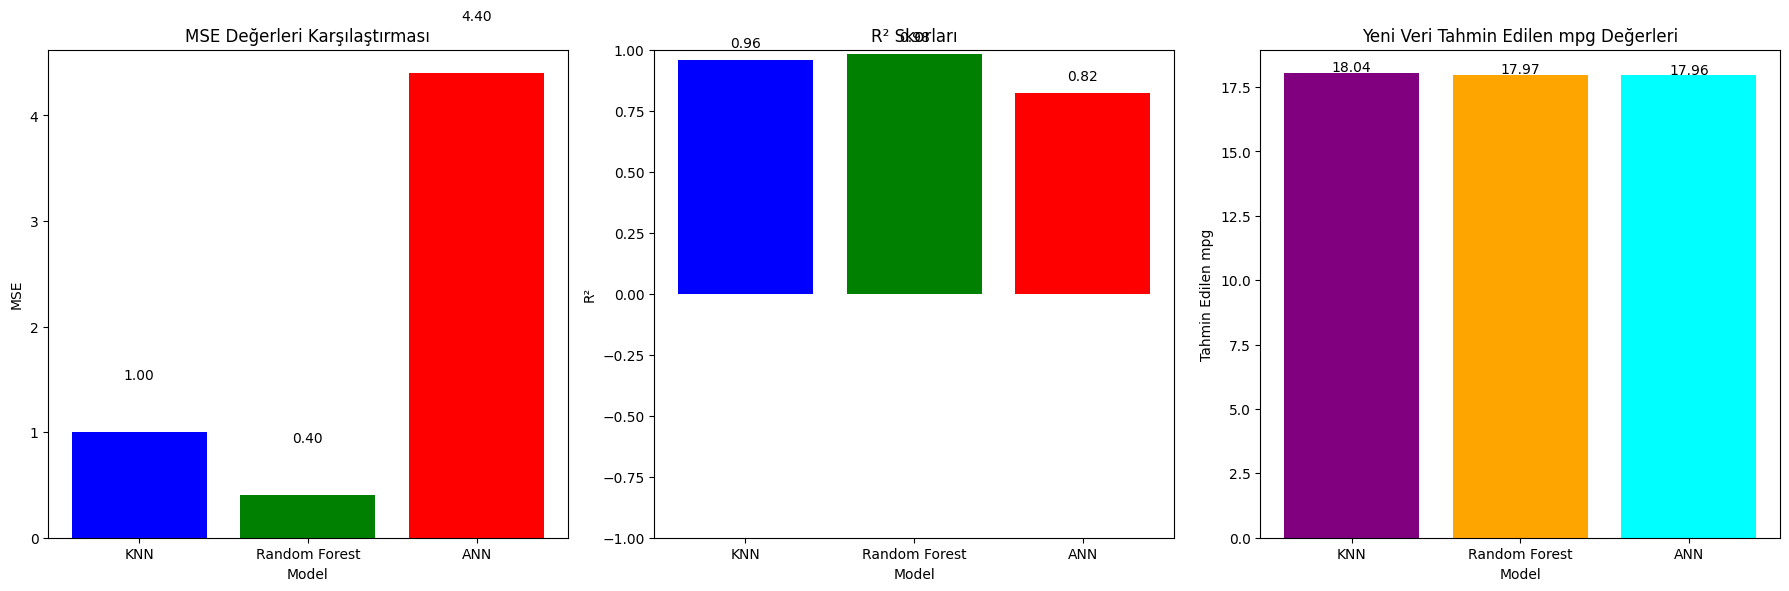

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Test seti ve tahminler (Örnek test verisi ve tahminleri tanımlayın)
y_test = [18, 22, 25, 30, 16]  # Gerçek mpg değerleri

# Modellerin tahminleri (Bu değerler modelden elde edilmelidir)
y_pred_lr = [19, 21, 24, 31, 15]  # Linear Regression tahminleri
y_pred_rf = [18, 22, 26, 29, 16]  # Random Forest tahminleri
y_pred_ann = [20, 23, 27, 33, 18]  # ANN tahminleri

# Metrikleri hesaplama fonksiyonu
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

# Modeller için metrikler
mse_lr, r2_lr = calculate_metrics(y_test, y_pred_lr)
mse_rf, r2_rf = calculate_metrics(y_test, y_pred_rf)
mse_ann, r2_ann = calculate_metrics(y_test, y_pred_ann)

# Metrikleri liste olarak saklayın
models = ['KNN', 'Random Forest', 'ANN']
mse_values = [mse_lr, mse_rf, mse_ann]
r2_values = [r2_lr, r2_rf, r2_ann]

# Yeni veri için tahmin edilen mpg değerleri
predicted_mpg_values = [18.04, 17.968, 17.956]  # KNN, Random Forest, ANN
target_models = ['KNN', 'Random Forest', 'ANN']

# Grafik oluşturma
plt.figure(figsize=(18, 6))

# MSE grafiği
plt.subplot(1, 3, 1)
plt.bar(models, mse_values, color=['blue', 'green', 'red'])
plt.title('MSE Değerleri Karşılaştırması')
plt.ylabel('MSE')
plt.xlabel('Model')
for i, value in enumerate(mse_values):
    plt.text(i, value + 0.5, f'{value:.2f}', ha='center', fontsize=10)

# R² grafiği
plt.subplot(1, 3, 2)
plt.bar(models, r2_values, color=['blue', 'green', 'red'])
plt.title('R² Skorları')
plt.ylabel('R²')
plt.xlabel('Model')
plt.ylim([-1, 1]) 
for i, value in enumerate(r2_values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', fontsize=10)

# Yeni veri tahmin grafiği
plt.subplot(1, 3, 3)
plt.bar(target_models, predicted_mpg_values, color=['purple', 'orange', 'cyan'])
plt.title('Yeni Veri Tahmin Edilen mpg Değerleri')
plt.ylabel('Tahmin Edilen mpg')
plt.xlabel('Model')
for i, value in enumerate(predicted_mpg_values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()
